## Chapter 02 Power_Spectrum

#### 2.1

In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import math
from scipy import signal

In [2]:
from data_loader import load_detrended_ssta

ssta, lon2, lat2, y, m = load_detrended_ssta()

In [3]:
def aave(west, east, south, north, \
        var = ssta, lon2 = lon2, lat2 = lat2):

    avar = var[(west<=lon2[:, 1])*(lon2[:, 1]<=east), :, :]
    avar = avar[:, (south<=lat2[1, :])*(lat2[1, :]<=north), :]

    alat2 = lat2[(west<=lon2[:, 1])*(lon2[:, 1]<=east), :]
    alat2 = alat2[:, (south<=lat2[1, :])*(lat2[1, :]<=north)]

    [imt, jmt, tmt] = avar.shape
    numer = np.zeros((imt, jmt, tmt))
    denom = np.zeros((imt, jmt, tmt))
    for k in range(tmt):
            for i in range(imt):
                for j in range(jmt):
                    numer[i, j, k] \
                          = avar[i, j, k] * math.cos(math.radians(alat2[i, j]))
                    denom[i, j, k] \
                          = math.cos(math.radians(alat2[i, j]))
    
    aave_var = np.nansum(np.nansum(numer, 0), 0) / \
               np.nansum(np.nansum(denom, 0), 0)
    return aave_var

def plot_mon_time(time_series, lower= -3, upper = 3, \
                  init_year=1982, fin_year=2019):
    mon = np.arange(init_year, fin_year+1, 1/12)
    plt.figure;
    plt.plot(mon, time_series)
    plt.plot(mon, 0*time_series, 'k')
    plt.xlim(init_year, fin_year)
    plt.ylim(lower, upper)
    plt.show()


#### 2.3

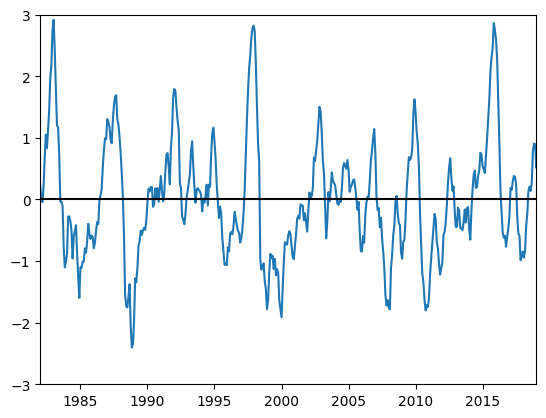

In [4]:
nino34 = aave(190, 250, -5, 5)
plot_mon_time(nino34)

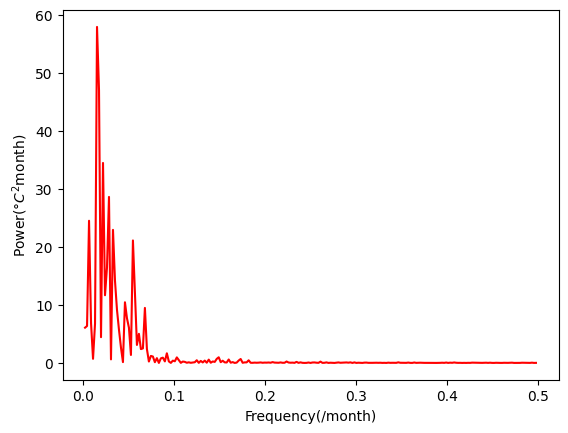

In [5]:
N = nino34.shape[0]
delta_t = 1

nino34_k = np.fft.fft(nino34)[1:math.floor(N/2)]
power = 2*np.abs(nino34_k)**2*delta_t/N


frequency = np.fft.fftfreq(N, delta_t)[1:math.floor(N/2)]

plt.plot(frequency, power, 'r')
plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.show()

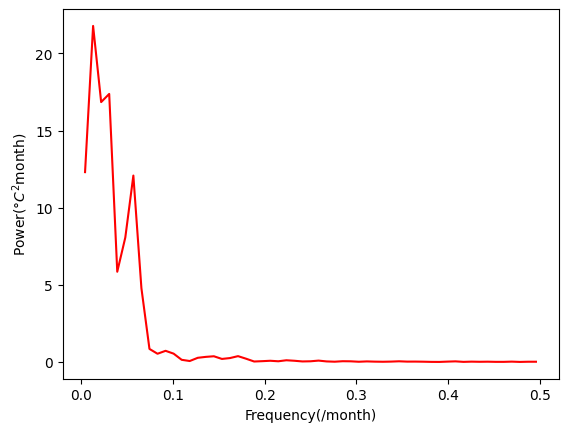

In [6]:
ave_num = 4

frequency_mean = np.zeros(int(math.floor(N/2)/ave_num))
power_mean = np.zeros(int(math.floor(N/2)/ave_num))

for nn in range(0, int(math.floor(N/2)/ave_num)):
    frequency_mean[nn] = np.mean(frequency[ave_num*nn:ave_num*(nn+1)-1])
    power_mean[nn] = np.mean(power[ave_num*nn:ave_num*(nn+1)-1])

plt.plot(frequency_mean, power_mean, 'r')
plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.show()

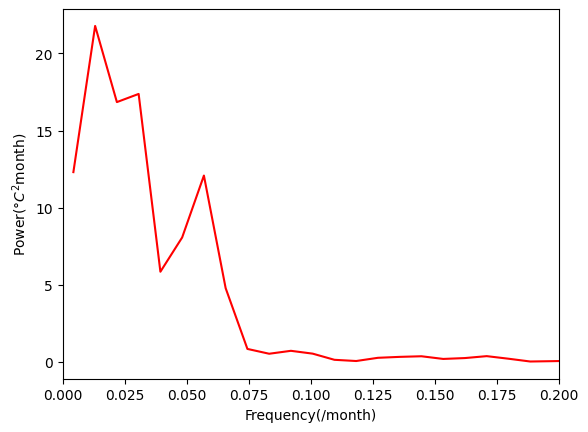

In [7]:
plt.plot(frequency_mean, power_mean, 'r')
plt.xlim(0, 0.2)
plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.show()

### 2.4 Welch's method

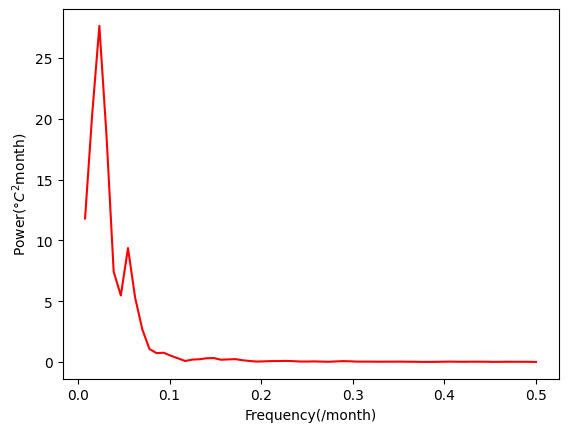

In [8]:
freq_welch, power_welch = signal.welch(nino34, nperseg=128)

plt.plot(freq_welch[1:], power_welch[1:], 'r')

plt.xlabel("Frequency(/month)")
plt.ylabel("Power($°C^2 \mathrm{month}$)")
plt.show()

### 2.5 

In [9]:
def draw_power(time_series, seg_length=128):
    freq_welch, power_welch = signal.welch(time_series, nperseg=seg_length)
    
    plt.plot(freq_welch[1:], power_welch[1:], 'r')
    
    plt.xlabel("Frequency(/month)")
    plt.ylabel("Power($°C^2 \mathrm{month}$)")
    plt.show()

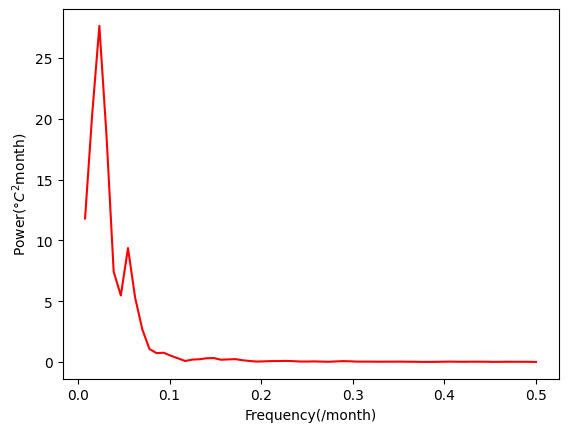

In [10]:
draw_power(nino34)

In [11]:
from  data_loader import load_tokyo_temp
y, m, tokyo = load_tokyo_temp()

tokyo = tokyo[(1990 <= y) *(y<=2019)]
m = m[(1990 <= y) *(y<=2019)]
y = y[(1990 <= y) *(y<=2019)]

tokyoc = np.zeros((12))
for mm in range(1, 13):
    tokyoc[mm-1] = np.nanmean(tokyo[m==mm], 0)

tokyoa = np.zeros((tokyo.shape))
for yy in range(1990, 2020):
    for mm in range(1, 12+1):
        tokyoa[(y==yy)*(m==mm)] = tokyo[(y==yy)*(m==mm)] - tokyoc[mm-1]

tokyo = signal.detrend(tokyo)
tokyoa = signal.detrend(tokyoa)

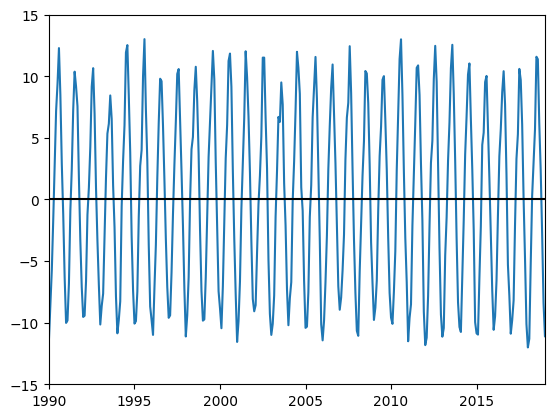

In [12]:
plot_mon_time(tokyo, lower= -15, upper=15, \
              init_year=1990, fin_year=2019)

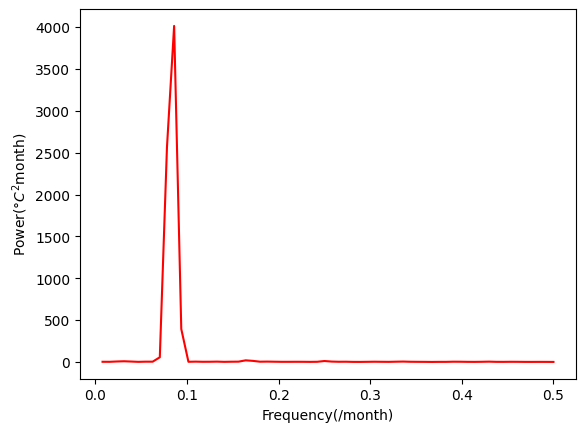

In [13]:
draw_power(tokyo)

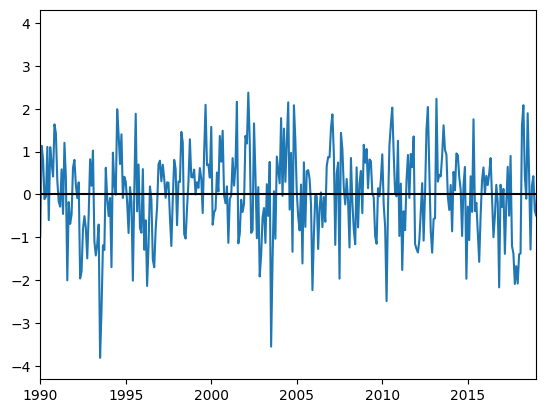

In [14]:
plot_mon_time(tokyoa, lower=-(np.amax(np.abs(tokyoa)) + 0.5), upper=np.amax(np.abs(tokyoa)) + 0.5, \
              init_year=1990, fin_year=2019)

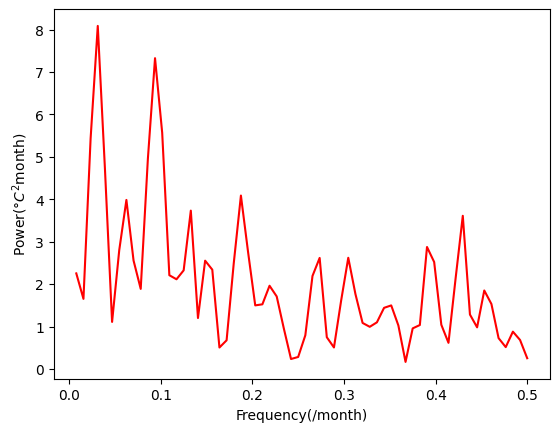

In [15]:
draw_power(tokyoa)

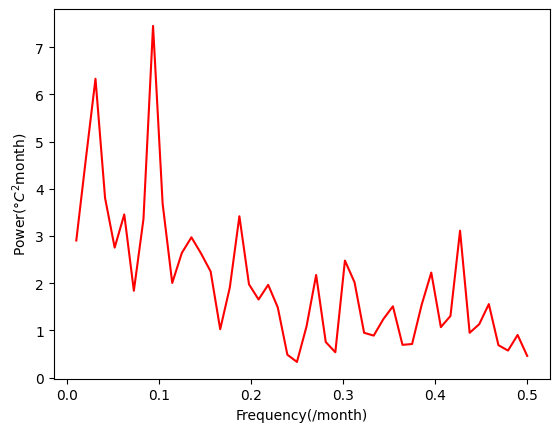

In [16]:
draw_power(tokyoa, 96)

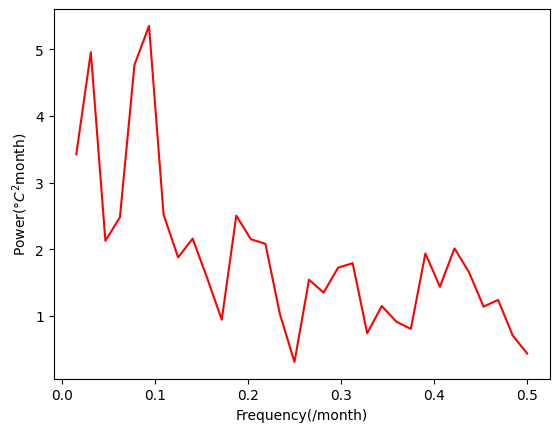

In [17]:
draw_power(tokyoa, 64)

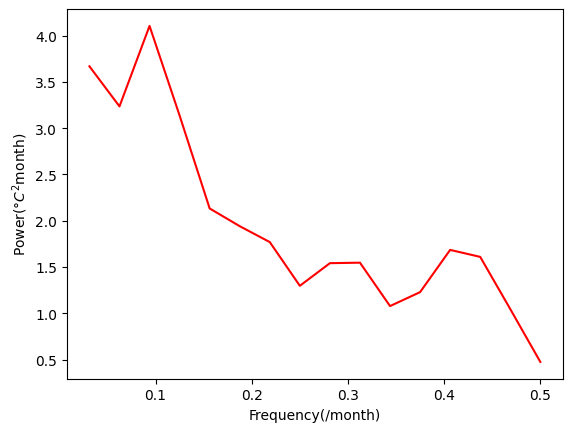

In [18]:
draw_power(tokyoa, 32)